In [13]:
import tensorflow as tf
from tensorflow.keras import layers , models
import matplotlib.pyplot as plt
import numpy as np

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(train_x, train_y), (test_x, test_y) = fashion_mnist


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , MaxPooling2D , Conv2D

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(filters=64 , kernel_size = (3,3) , activation='relu' , input_shape=(28,28,1)))

C:\Users\Samruddhi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
model.add(Flatten())


In [8]:
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )

In [14]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)
     

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.7973 - loss: 3.4786 - val_accuracy: 0.8851 - val_loss: 0.3253
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9033 - loss: 0.2664 - val_accuracy: 0.8793 - val_loss: 0.3559
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9179 - loss: 0.2273 - val_accuracy: 0.8818 - val_loss: 0.3431
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9221 - loss: 0.2074 - val_accuracy: 0.8879 - val_loss: 0.3434
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9300 - loss: 0.1884 - val_accuracy: 0.8865 - val_loss: 0.3498


In [15]:
loss , acc = model.evaluate(test_x , test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8823 - loss: 0.3630


In [16]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']
     

In [17]:
predictions = model.predict(test_x[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


In [18]:
label = labels[np.argmax(predictions)]

ankle_boots


<function matplotlib.pyplot.show(close=None, block=None)>

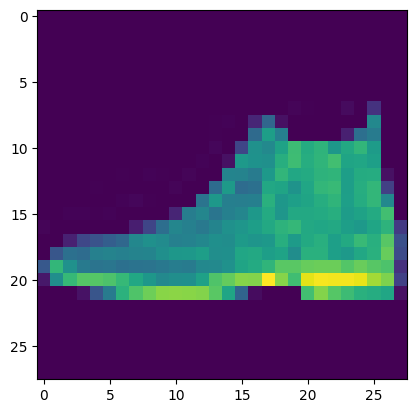

In [19]:
print(label)
plt.imshow(test_x[:1][0])
plt.show